# Setup

In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import seaborn as sns

In [2]:
def yn_switch(opdfnew):
    opdfnew["Narcan Admin"] = opdfnew['Naloxone Administered'].map(lambda x: 1 if x == "Y" else 0)
    opdfnew["Survive"] = opdfnew['Survive'].map(lambda x: 1 if x == "Y" else 0)

    return(opdfnew)    
        

# Read PAGOV dataset

In [3]:
df = pd.read_csv('../data/Pulled/PAGOV.csv')
df.head()

,Incident ID,Incident Date,Incident Time,Day,Incident County Name,Incident State,Victim ID,Gender Desc,Age Range,Race,...,Revive Action Desc,Third Party Admin Desc,Incident County FIPS Code,Incident County Latitude,Incident County Longitude,Victim County FIPS Code,Victim County Latitude,Victim County Longitude,Incident County Latitude and Longitude,Victim County Latitude and Longitude
0,1,1/4/2018,0:42:00,Thursday,Delaware,Pennsylvania,1,Male,50 - 59,White,...,NaN,GOOD SAMARITAN,45,39.916579,-75.406277,45.0,39.916579,-75.406277,"(39.916579, -75.406277)","(39.916579, -75.406277)"
1,1,1/4/2018,0:42:00,Thursday,Delaware,Pennsylvania,1,Male,50 - 59,White,...,NaN,NaN,45,39.916579,-75.406277,45.0,39.916579,-75.406277,"(39.916579, -75.406277)","(39.916579, -75.406277)"
2,1,1/4/2018,0:42:00,Thursday,Delaware,Pennsylvania,1,Male,50 - 59,White,...,NaN,GOOD SAMARITAN,45,39.916579,-75.406277,45.0,39.916579,-75.406277,"(39.916579, -75.406277)","(39.916579, -75.406277)"
3,1,1/4/2018,0:42:00,Thursday,Delaware,Pennsylvania,1,Male,50 - 59,White,...,NaN,NaN,45,39.916579,-75.406277,45.0,39.916579,-75.406277,"(39.916579, -75.406277)","(39.916579, -75.406277)"
4,26,1/26/2018,9:14:00,Friday,Chester,Pennsylvania,5,Male,25 - 29,White,...,NaN,NaN,29,39.974871,-75.756265,29.0,39.974871,-75.756265,"(39.974871, -75.756265)","(39.974871, -75.756265)"


# Data Pre-Processing

In [4]:
opiod_list = ['CARFENTANIL','FENTANYL','FENTANYL ANALOG/OTHER SYNTHETIC OPIOID','HEROIN','METHADONE','PHARMACEUTICAL OPIOID','SUBOXONE']

# Reduce incidents to ones with specific opioid
opdf = df.loc[df['Susp OD Drug Desc'].isin(opiod_list)]

# Store relevant information
opdf = opdf[['Incident ID','Incident County Name','Incident Date','Victim ID','Gender Desc','Day','Naloxone Administered','Age Range','Survive','Response Desc','Incident Time']]

# Remove duplicates
opdf = opdf.drop_duplicates()
opdf['Incident Date ym'] = pd.to_datetime(opdf['Incident Date']).dt.to_period('M')

In [5]:
oppdf = opdf.groupby(['Incident Date ym'])[['Incident ID']].count().reset_index()
oppdf.head()

,Incident Date ym,Incident ID
0,2018-01,163
1,2018-02,162
2,2018-03,384
3,2018-04,432
4,2018-05,479


In [6]:
opdfnew = yn_switch(opdf.copy())
opdfnew.head()

,Incident ID,Incident County Name,Incident Date,Victim ID,Gender Desc,Day,Naloxone Administered,Age Range,Survive,Response Desc,Incident Time,Incident Date ym,Narcan Admin
2,1,Delaware,1/4/2018,1,Male,Thursday,Y,50 - 59,0,NO RESPONSE TO NALOXONE,0:42:00,2018-01,1
4,26,Chester,1/26/2018,5,Male,Friday,N,25 - 29,0,NaN,9:14:00,2018-01,0
5,27,Beaver,1/24/2018,4,Male,Wednesday,N,30 - 39,1,NaN,23:32:00,2018-01,0
6,28,Bucks,1/15/2018,6,Male,Monday,N,25 - 29,1,NaN,23:41:00,2018-01,0
7,29,Bucks,1/15/2018,7,Female,Monday,N,30 - 39,1,NaN,10:54:00,2018-01,0


### Store in CSV

In [7]:
# opdfnew.to_csv('../data/Aggregated/opioid_for_daytimeplot.csv')

## Age Plots

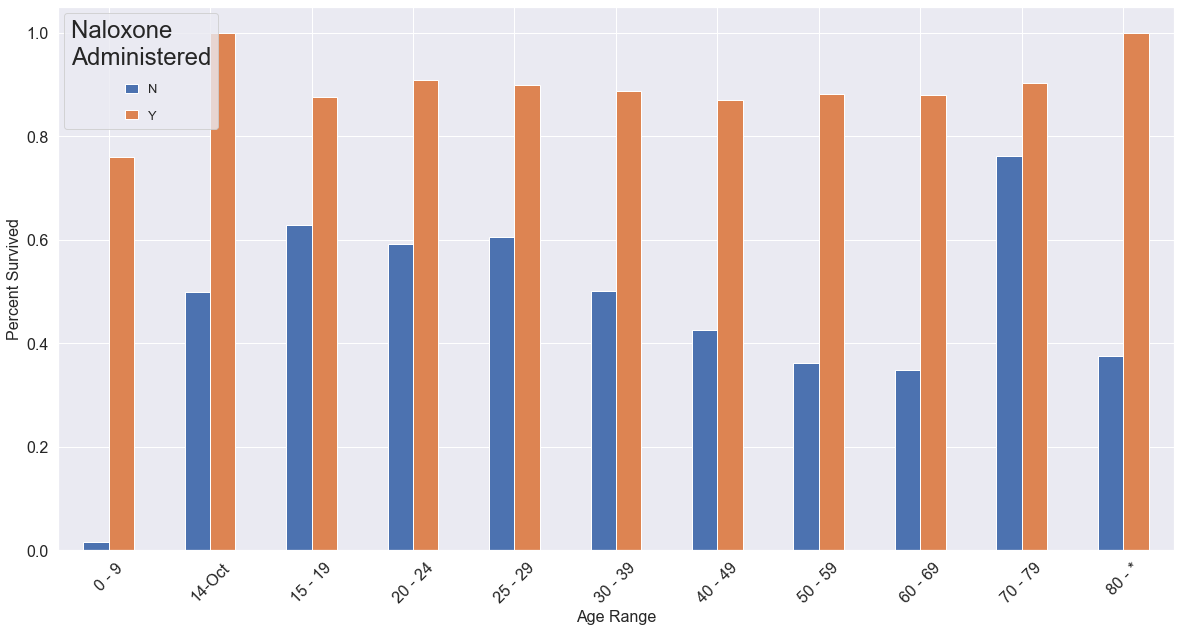

In [16]:
### Plotting a line chart time series try

plt.rcParams["figure.figsize"] = (20,10)
#plt.xticks(rotation=45)
sns.set(font_scale = 2)


opdfnew.groupby(['Age Range', 'Naloxone Administered'])['Survive'].mean().unstack().plot.bar(fontsize=16)
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(xlabel = 'Age Range', fontsize=16)
plt.ylabel(ylabel = 'Percent Survived', fontsize=16)
plt.legend(borderpad=.5, labelspacing=1.1,handlelength=1,fontsize = 13, title = 'Naloxone \nAdministered')
plt.show()

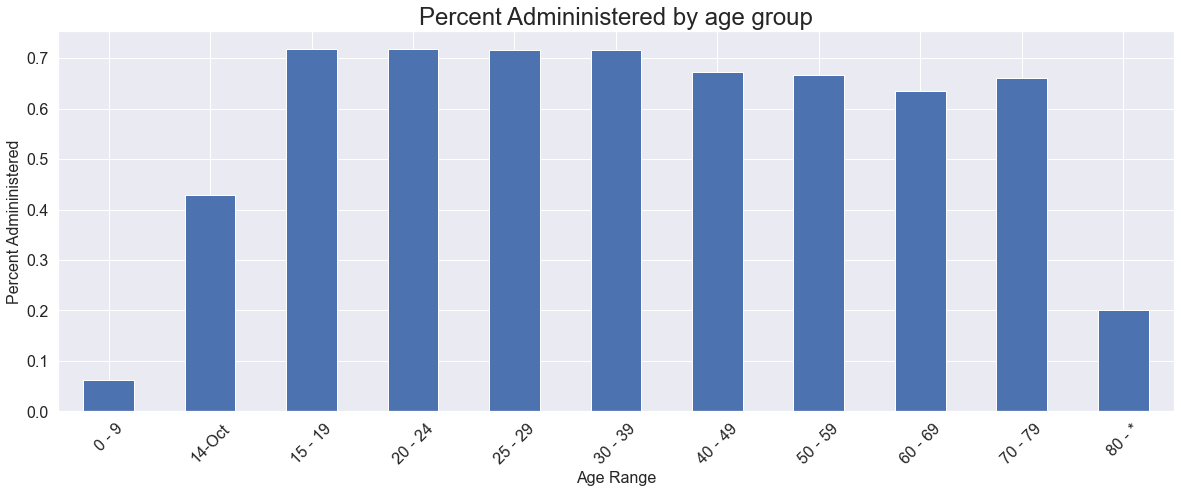

In [9]:
### Plotting a line chart time series try

plt.rcParams["figure.figsize"] = (20,7)
#plt.xticks(rotation=45)
sns.set(font_scale = 2)


opdfnew.groupby(['Age Range'])['Narcan Admin'].mean().plot.bar(fontsize=16)
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(xlabel = 'Age Range', fontsize=16)
plt.ylabel(ylabel = 'Percent Admininistered', fontsize=16)
plt.title('Percent Admininistered by age group')
plt.show()

## County Plots

In [10]:
### By county Admin
df1 = yn_switch(opdf.copy())
df1.head()

,Incident ID,Incident County Name,Incident Date,Victim ID,Gender Desc,Day,Naloxone Administered,Age Range,Survive,Response Desc,Incident Time,Incident Date ym,Narcan Admin
2,1,Delaware,1/4/2018,1,Male,Thursday,Y,50 - 59,0,NO RESPONSE TO NALOXONE,0:42:00,2018-01,1
4,26,Chester,1/26/2018,5,Male,Friday,N,25 - 29,0,NaN,9:14:00,2018-01,0
5,27,Beaver,1/24/2018,4,Male,Wednesday,N,30 - 39,1,NaN,23:32:00,2018-01,0
6,28,Bucks,1/15/2018,6,Male,Monday,N,25 - 29,1,NaN,23:41:00,2018-01,0
7,29,Bucks,1/15/2018,7,Female,Monday,N,30 - 39,1,NaN,10:54:00,2018-01,0


In [11]:
dfcnt = df1['Incident County Name'].value_counts().reset_index()
dfcnt.head()

,index,Incident County Name
0,Allegheny,2705
1,York,1619
2,Bucks,1485
3,Erie,1029
4,Dauphin,850


In [12]:
dfcnt = dfcnt[dfcnt['Incident County Name']>350]
dfcnt =dfcnt.rename(columns={'index':'Incident County Name','Incident County Name':'Total For County'})
dfcnt.sort_values(by=['Total For County'], inplace=True, ascending=False)
dfcnt2 = pd.merge(df1,dfcnt, how="inner",left_on ='Incident County Name',right_on= 'Incident County Name')

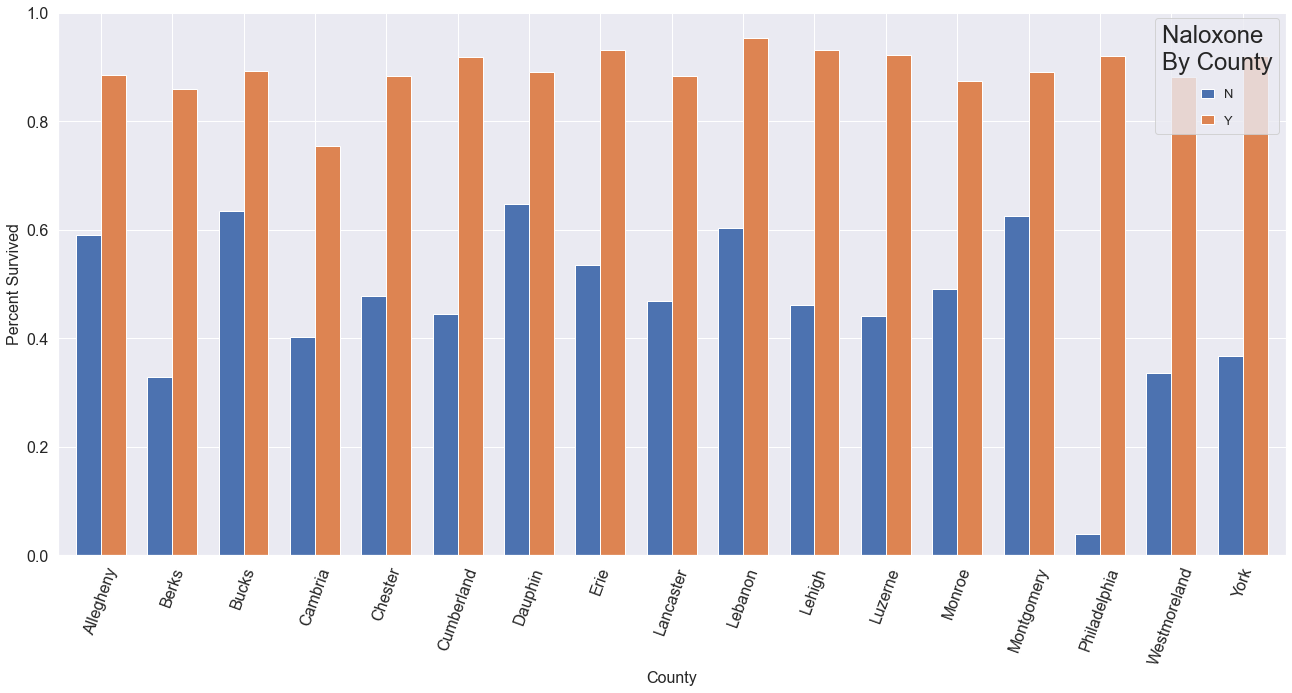

In [13]:
plt.rcParams["figure.figsize"] = (22,10)
sns.set(font_scale = 2)


dfcnt2.groupby(['Incident County Name', 'Naloxone Administered'])['Survive'].mean().unstack().plot.bar(fontsize=16,width = 0.7)
plt.xticks(rotation=70,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(xlabel = 'County', fontsize=16)
plt.ylabel(ylabel = 'Percent Survived', fontsize=16)
plt.legend(borderpad=.5, labelspacing=1.1,handlelength=1,fontsize = 13, title = 'Naloxone \nBy County')
plt.show()

In [14]:
countindex = []
for i, row in dfcnt.iterrows():
    countindex.append(row['Incident County Name'])

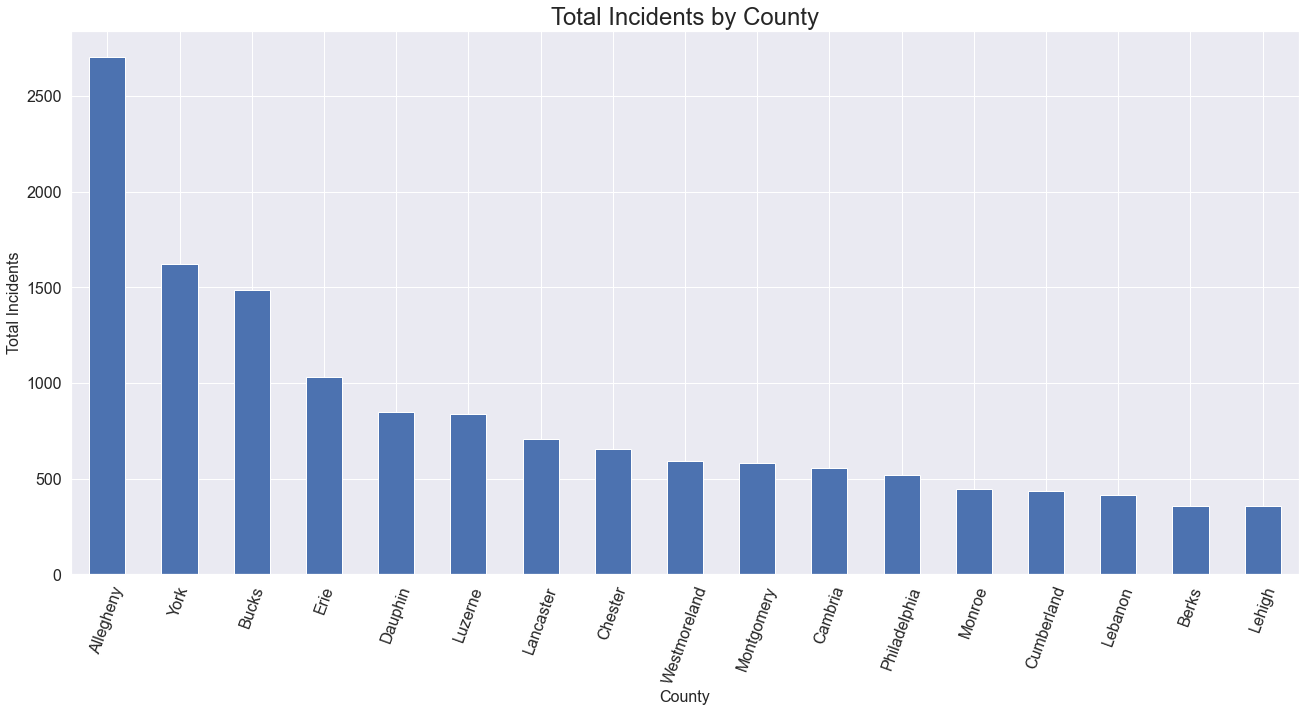

In [15]:
plt.rcParams["figure.figsize"] = (22,10)


dfcnt2.groupby(['Incident County Name'])['Incident ID'].count().reindex(countindex).plot.bar(fontsize=16)
plt.xticks(rotation=70,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(xlabel = 'County', fontsize=16)
plt.ylabel(ylabel = 'Total Incidents', fontsize=16)
plt.title('Total Incidents by County')
plt.show()